In [2]:
import numpy as np
import pandas as pd
from scipy import interpolate

import xarray as xr

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # converts datetime64 to datetime
import cmocean # for nice oceanography colour pallettes

import seaborn as sns

# change plotting defaults
sns.set(#font='Franklin Gothic Book',
        rc={
         'axes.axisbelow': False,
         'axes.edgecolor': 'Black',
         'axes.facecolor': 'white',
         'axes.grid': False,
         'axes.labelcolor': 'k',
         'axes.spines.right': True,
         'axes.spines.top': True,
         'figure.facecolor': 'white',
         'lines.solid_capstyle': 'round',
         'patch.edgecolor': 'k',
         'patch.force_edgecolor': True,
         'text.color': 'k',
         'xtick.bottom': True,
         'xtick.color': 'k',
         'xtick.direction': 'out',
         'xtick.top': False,
         'ytick.color': 'k',
         'ytick.direction': 'out',
         'ytick.left': True,
         'ytick.right': False},
         font_scale=1)
mpl.rcParams["figure.titlesize"] = 40
mpl.rcParams["axes.titlesize"] = 40
mpl.rcParams["axes.labelsize"] = 30
mpl.rcParams["font.size"] = 20
mpl.rcParams["xtick.labelsize"] = 20
mpl.rcParams["ytick.labelsize"] = 20
mpl.rcParams["ytick.labelright"] = False

# load data into an xarray Dataset

In [18]:
temp = pd.read_csv('temperatur_ANN_Sverige_statAll_edited.csv',sep=';').to_xarray()
tvars = list(temp.data_vars.keys())
time = np.asarray(pd.date_range("1860-01-01","2021-12-31",freq="1Ys"))

temp = xr.Dataset(
            data_vars = dict(
                             t      = (['time'], temp[tvars[1]].data),
                             mv_avg = (['time'], temp[tvars[2]].data),
                            ),
            coords   = dict(
                            time  = (['time'], time),
                            ),
            attrs    = dict(description=str('Swedish average temperature 1860-2021 as per SMHI (2022).'))
                )

for n in list(temp.data_vars.keys()):
    temp[n].attrs["units"] = '°C'
    temp[n] = temp[n].astype('float')
    
temp.t.attrs['description'] = 'Yearly average data'
temp.mv_avg.attrs['description'] = '10 year running mean.'

In [32]:
temp.to_netcdf('Sweden_temp.nc')

In [6]:
temp = xr.open_dataset('Sweden_temp.nc')

# plotting

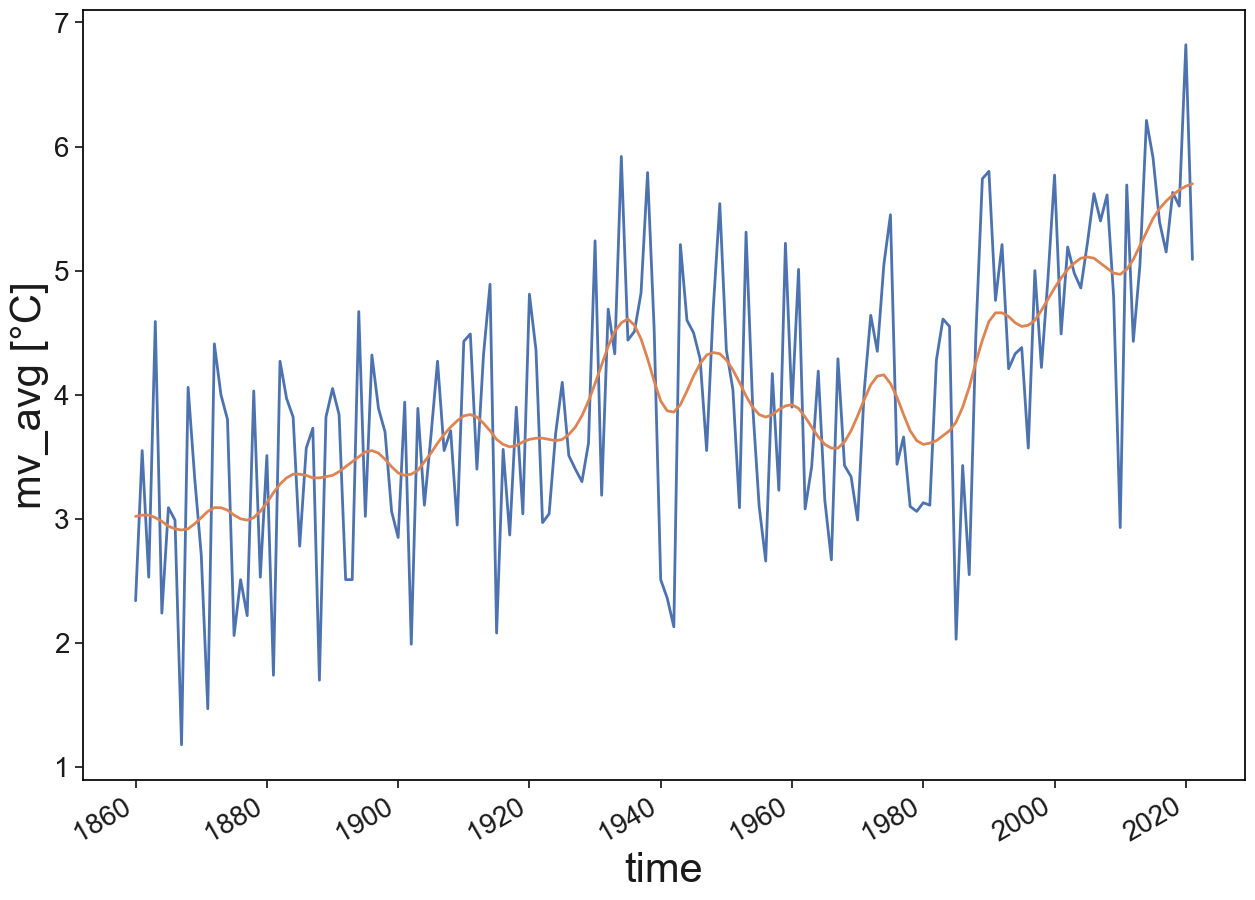

In [43]:
temp.t.plot(figsize=(15,10),lw=2)
temp.mv_avg.plot(lw=2)

5.196000000000001


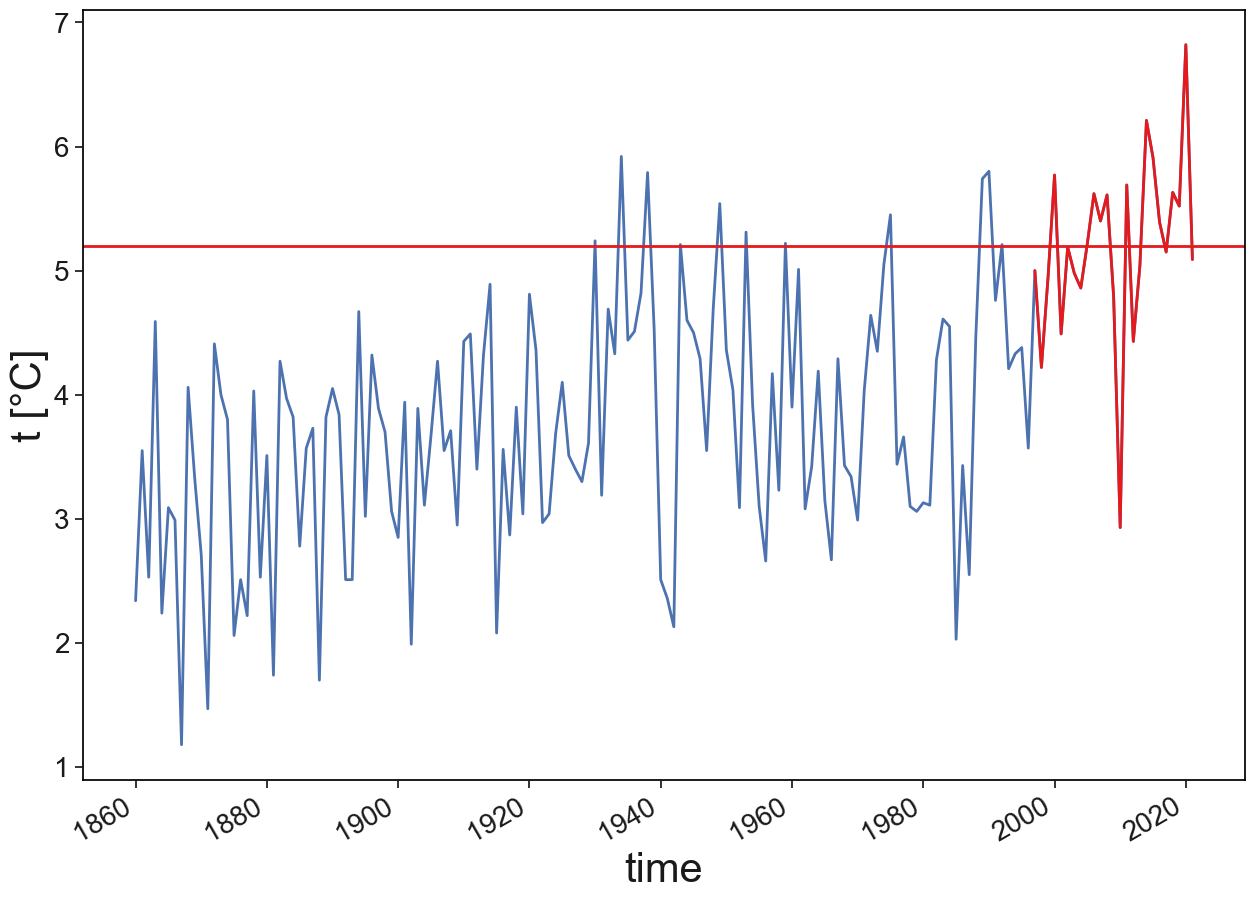

In [75]:
tmp = temp.isel(time=slice(yr -1860,yr+30 -1860))

print(tmp.t.mean().values)


temp.t.plot(figsize=(15,10),lw=2)

tmp.t.plot(lw=2,c='#e41a1c')
plt.axhline(tmp.t.mean().values,xmin=mdates.date2num(tmp.time[0].values),xmax=mdates.date2num(tmp.time[-1].values)) 
plt.axhline(tmp.t.mean().values,c='#e41a1c',lw=2)
#xmin=mdates.date2num(tmp.time[0]),xmax=mdates.date2num(tmp.time[-1]))

plt.show()

# write func to colour plot automotically for parents mean and person's mean (or normal) climate

In [16]:
def tmp_ds(yr,temp=temp):
    """create temporary dataset for a person's life."""
    tmp = temp.isel(time=slice(yr -1860,2022 -1860))
    return tmp

def tmp_parents(yr,temp=temp):
    """create temporary dataset for person's parents' lives pre-child."""
    tmp = temp.isel(time=slice(yr-30 -1860,yr-30 + (2022-yr) -1860))
    return tmp

def plot_norm(temp,yr = 1997):
    """
    Plot time series with person's 'normal' experience.
    
    Parameters:
    --------------
    temp: xarray dataset of temperature;
    yr:   integer, year of birth. 
    """

    temp.t.plot(figsize=(15,10),lw=2,zorder=1)
    
    # plot person's lifetime
    tmp = tmp_ds(yr)
    tmp.t.plot(lw=2,c='#e41a1c',zorder=3)
    plt.axhline(tmp.t.mean().values,xmin=mdates.date2num(tmp.time[0].values),xmax=mdates.date2num(tmp.time[-1].values)) 
    plt.axhline(tmp.t.mean().values,c='#e41a1c',lw=2,ls='--')
    #xmin=mdates.date2num(tmp.time[0]),xmax=mdates.date2num(tmp.time[-1]))
    
    # plot ALL of parent's lifetime    
    tmp = tmp_ds(yr-30,)
    tmp.t.plot(lw=2,c='#4daf4a',zorder=2)
    plt.axhline(tmp.t.mean().values,c='#4daf4a',lw=2,ls='--')

    # plot parent's lifetime pre-child.
    
#    tmp = tmp_parents(yr-30,)
 #   tmp.t.plot(lw=2,c='k',zorder=2)
  #  plt.axhline(tmp.t.mean().values,c='k',lw=2,ls='--')

    plt.show()    

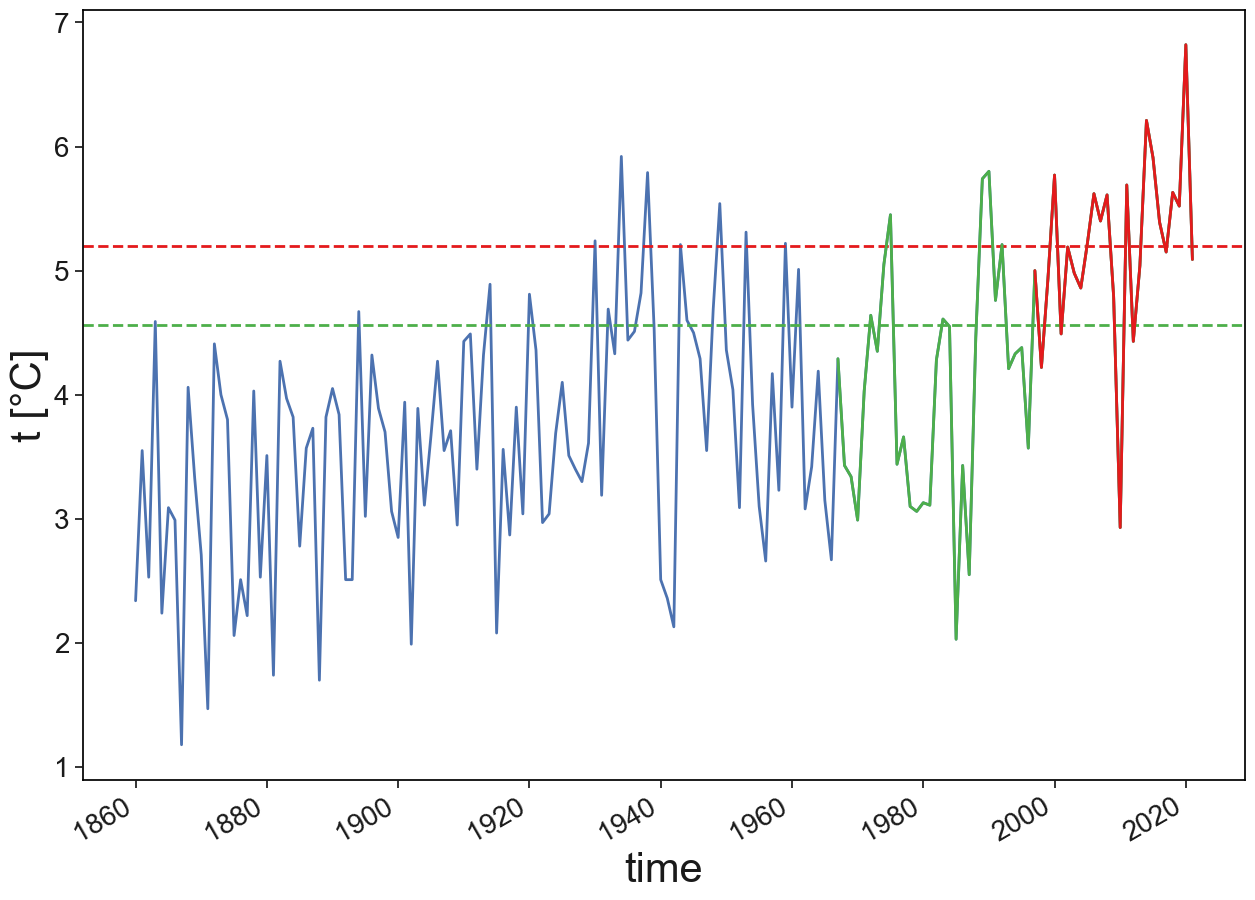

In [17]:
plot_norm(temp,1997)